In [12]:
import pandas as pd
import numpy as np

df= pd.read_csv('../data/clean_data.csv')
df


,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,nbr_bedrooms,equipped_kitchen,terrace_sqm,garden_sqm,state_building,primary_energy_consumption_sqm,heating_type,other_amenities
0,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,1963.0,100.0,2.0,INSTALLED,5.0,0.0,MISSING,231.0,GAS,1
1,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,2024.0,187.0,3.0,MISSING,0.0,0.0,MISSING,99.0,MISSING,1
2,3500000.0,HOUSE,VILLA,Flanders,West Flanders,Brugge,8300,51.353323,3.296353,1935.0,277.0,6.0,MISSING,0.0,0.0,TO_RENOVATE,394.0,MISSING,0
3,347000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Mechelen,2820,51.024073,4.542449,2011.0,102.0,2.0,INSTALLED,NaN,0.0,MISSING,113.0,GAS,1
4,110000.0,HOUSE,HOUSE,Wallonia,Hainaut,Charleroi,6010,50.393419,4.469180,1918.0,150.0,2.0,INSTALLED,NaN,0.0,TO_RENOVATE,386.0,FUELOIL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,320000.0,APARTMENT,APARTMENT,Flanders,East Flanders,Gent,9000,51.027424,3.696983,2023.0,90.0,2.0,HYPER_EQUIPPED,11.0,NaN,MISSING,20.0,MISSING,1
24932,265000.0,HOUSE,HOUSE,Wallonia,Liège,Waremme,4280,50.696639,5.129448,1900.0,165.0,3.0,INSTALLED,15.0,364.0,GOOD,494.0,MISSING,2
24933,255000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2600,51.185968,4.442665,1979.0,105.0,2.0,HYPER_EQUIPPED,9.0,0.0,GOOD,161.0,MISSING,2
24934,285000.0,APARTMENT,APARTMENT,Flanders,Limburg,Hasselt,3580,51.079377,5.226001,2013.0,185.0,4.0,MISSING,0.0,0.0,MISSING,91.0,GAS,2


In [13]:
X= df.drop(['price'],axis=1)
y= df['price']
print(X.shape)
print(y.shape)

(24936, 18)
(24936,)


In [14]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test =train_test_split (X,y, test_size= 0.2, random_state=42)

In [15]:
import catboost as cb
from catboost import CatBoostRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

categorical_feature_indices = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(include=['object']).columns]
model = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, verbose=0) 
model.fit(X_train, y_train, cat_features = categorical_feature_indices)

print('Training Score:', model.score(X_train, y_train))
print('Testing Score:', model.score(X_test, y_test))

pred=model.predict(X_test)
print('RMSE : ', root_mean_squared_error(y_test,pred))
print('MAE :',mean_absolute_error(y_test, pred))

Training Score: 0.9032983867665192
Testing Score: 0.8137948620777824
RMSE :  199075.41455931086
MAE : 92223.55480747891


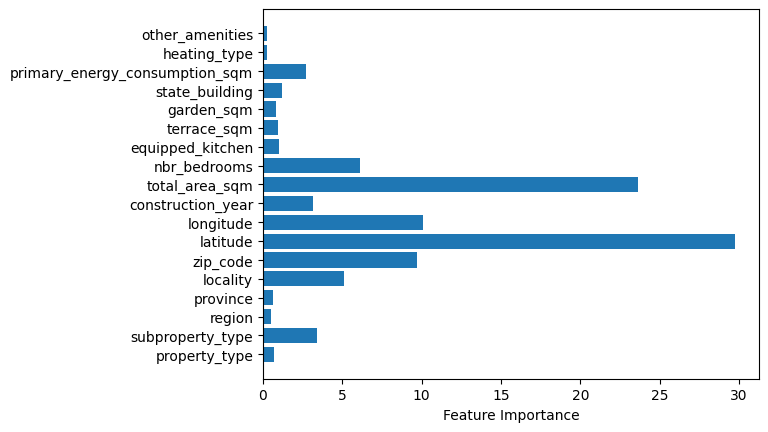

In [16]:
import matplotlib.pyplot as plt

# Plot feature importance
feature_importances = model.feature_importances_
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.show()


In [17]:
feature_importances = model.get_feature_importance()
print(feature_importances)

[ 0.71947869  3.38382471  0.51923082  0.63634449  5.08622419  9.72881334
 29.76007119 10.08075299  3.17697637 23.59624967  6.13460881  0.99596094
  0.92469615  0.79063569  1.22461964  2.68514912  0.28497934  0.27138386]


Predictions: Continuous values for regression; compare predicted vs. actual values

Text(0.5, 1.0, 'Random Forest')

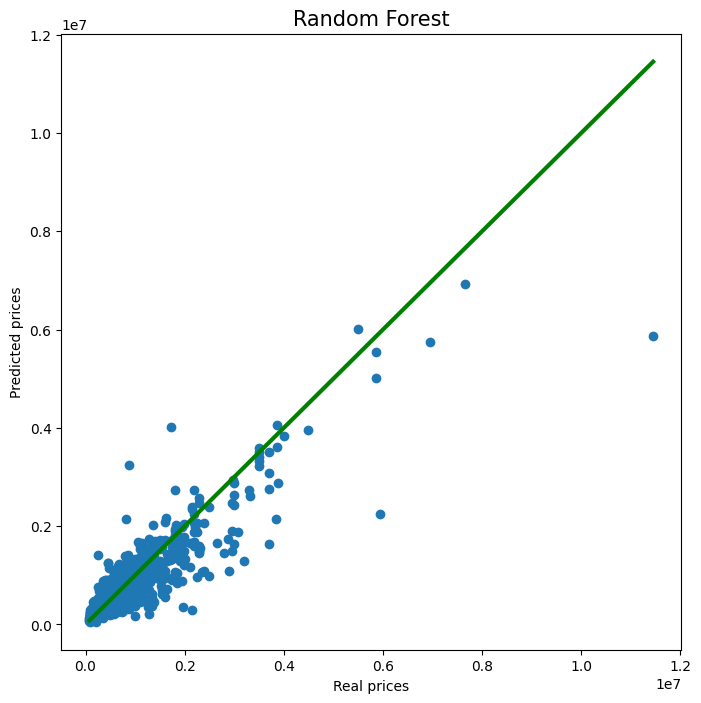

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (8,8))

plt.scatter(y_test, pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', lw=3)
plt.xlabel("Real prices", size=10)
plt.ylabel("Predicted prices", size=10)
plt.title("Random Forest", size=15)